$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 2$
---
Joanna Wójcicka, gr .2
---

# 2.1 MLP with multiple outputs

We will use [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist) from Zalando. The dataset contains labelled grayscale 28x28 images of clothing articles (10 classes).

In [122]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X=np.concatenate((np.array(X_train),np.array(X_test)),axis=0);
y=np.concatenate((np.array(y_train),np.array(y_test)),axis=0);
# X=X.reshape(X.shape[0],X.shape[1]*X.shape[2])
X=X/255

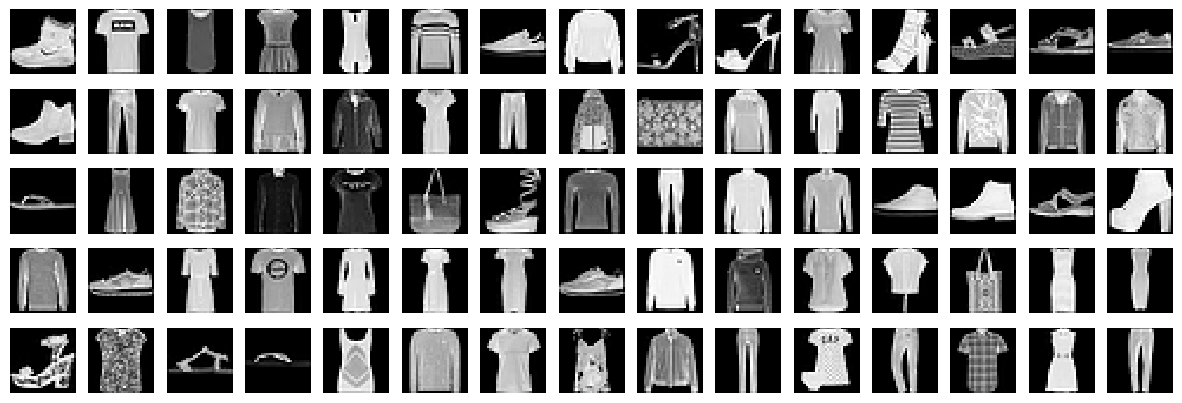

In [123]:
import matplotlib.pyplot as plt
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
col2 = 15
row2 = 5
fig = plt.figure(figsize=(col2, row2))
for index2 in range(0, col2*row2):
    fig.add_subplot(row2, col2, index2 + 1)
    plt.axis('off')
    plt.imshow(X[index2]) # index of the sample image
plt.show()

**How many classes?**

In [124]:
print(max(y)+1)

# or

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
print(f"{le.classes_} {len(le.classes_)}")

10
[0 1 2 3 4 5 6 7 8 9] 10


We create a neural net with 10 neurons in the output layer and *softmax* activation function.

As the loss, sparse_categorical_crossentropy is used,
$-\sum_{i=1}^m \sum_{j=1}^k \mathbb{1}(y_i=j)\cdot ln(p_{j})$
where
* $m$ - number of observations
* $k$ - number of labes
* $\mathbb{1}(y_i=j)$ - indicator function, returns 1 if condition is true, i.e. label $y_i$ is equal to $j$, otherwise 0


*softmax* slects a neuron with the highest probability value but it is smooth and differentiable

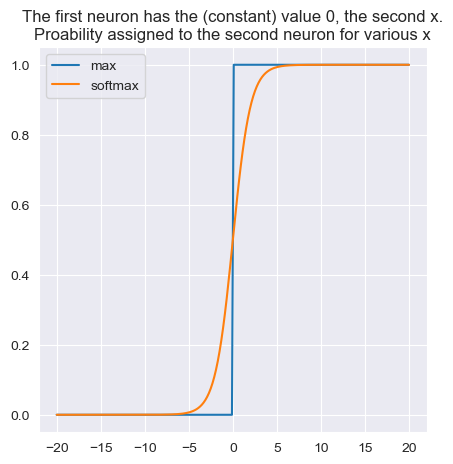

In [125]:
x=np.linspace(-20,20,200)
zeros = x*0
X_all=np.stack((zeros,x),axis=-1)

plt.title("The first neuron has the (constant) value 0, the second x.\nProability assigned to the second neuron for various x")
plt.plot(x,np.argmax(X_all,axis=1),label='max')
plt.plot(x,np.exp(X_all[:,1])/((np.exp(X_all[:,0])+np.exp(X_all[:,1]))),label='softmax')
plt.legend()
plt.show()

## 2.1.1 Tensorflow based implementation

In [126]:
from keras import models
from keras import layers


num_classes = y_train.max()+1

model = models.Sequential()
model.add(layers.Input(shape=(28,28,)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu' ))
model.add(layers.Dense(40, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))
model.compile(optimizer='rmsprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 40)             │        10,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           410 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 211,650 (826.76 KB)

 Trainable params: 211,650 (826.76 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [128]:
y.shape

(70000,)

** TODO ** Select number of epochs and batch size

In [129]:
hist = model.fit(X_train,y_train,epochs=50,batch_size=256, verbose=0)

In [130]:
test_proba = model.predict(X_test)

722/722 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


`test_proba` contains probabilities assigned to output neurons.  

In [131]:
import pandas as pd

df = pd.DataFrame(test_proba)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,1.164411e-18,6.358810e-07,5.600997e-01,5.684497e-07,4.398991e-01,2.706255e-24,1.292564e-09,1.275078e-21,4.090586e-12,2.218290e-23
1,6.878352e-15,1.515648e-17,1.840347e-17,1.064661e-15,4.192046e-16,1.423049e-12,9.238968e-16,1.000000e+00,1.636640e-15,9.534276e-17
2,9.996500e-01,1.695111e-04,1.595618e-06,1.245128e-04,6.597622e-09,7.774023e-19,5.445664e-05,1.445247e-14,5.241614e-13,5.681462e-18
3,1.664192e-13,4.212822e-16,1.808735e-16,1.421935e-18,1.231241e-16,1.187562e-13,6.110750e-18,1.000000e+00,6.154242e-17,1.555255e-14
4,2.855585e-18,0.000000e+00,3.630349e-32,6.577634e-37,2.616068e-33,2.157281e-11,8.830590e-32,7.864972e-17,2.771110e-25,1.000000e+00


In [132]:
y_test_pred = np.argmax(test_proba,axis=1)

**Confusion matrix**

In [133]:
import seaborn as sns

def show_confusion_matrix(matrix, labels=None):
    num_classes = matrix.shape[0]
    if labels is None:
      labels = [str(i) for i in range(num_classes)]
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=labels[0:num_classes],
                yticklabels=labels[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


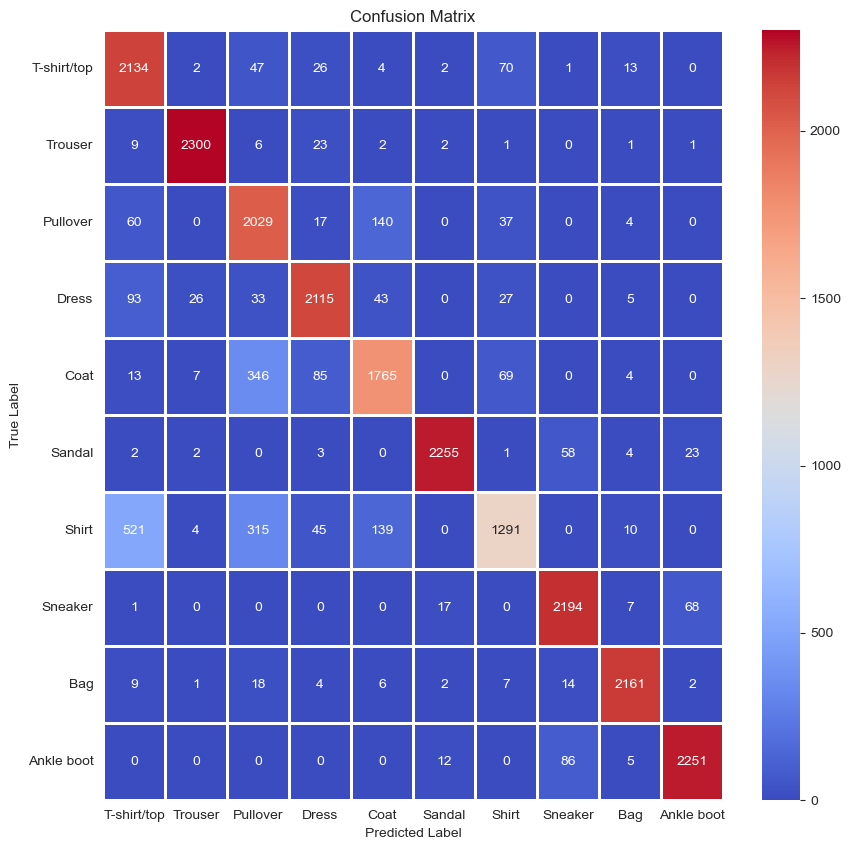

In [134]:
from sklearn.metrics import confusion_matrix

LABELS= ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]


show_confusion_matrix(confusion_matrix(y_test,y_test_pred),LABELS)

**TODO** Analyze cases of misclassification

T-shirts are often confused with shirts and vice versa, because they can be quite similar. In addition, coast and pullovers can get confused between each other too. What is interesting, different types of shoes are not confused even though it may be an intuitive thing to happen.

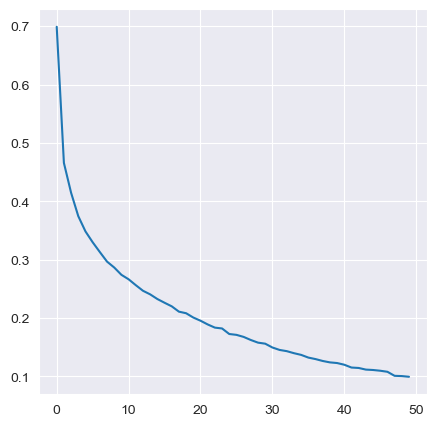

In [135]:
plt.plot(hist.history['loss'])
plt.show()

## 2.1.2 PyTorch based implementation

In [136]:
import torch
import torch.nn as nn
import torch.optim as optim

# --- parametry ---
input_shape = (X.shape[0], X.shape[1])
num_classes = int(y_train.max() + 1)

# --- model ---
class SimpleNet(nn.Module):
    def __init__(self, num_classes):
        super(SimpleNet, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 40)
        self.fc3 = nn.Linear(40, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.softmax(x)
        return x

model = SimpleNet(num_classes)
print(model)


SimpleNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=10, bias=True)
  (relu): ReLU()
  (softmax): Softmax(dim=1)
)


In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

* `torch.TensorDataset` stores X and y tensors in memory. It is much simpler then equivalent `tf.Dataset`, which can provide access to any data regardless of their location.

* `torch.DataLoader` provides functionality analogous to `tf.Dataset`: forming batches and buffer shuffling.

In [138]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# conversion form numpy to PyTorch tensors
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.long)
X_test_t  = torch.tensor(X_test, dtype=torch.float32)
y_test_t  = torch.tensor(y_test, dtype=torch.long)

# Dataset
train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=128)
test_loader = DataLoader(test_dataset, batch_size=len(y_test), num_workers=2)


In [139]:
num_classes = int(y_train.max() + 1)
model = SimpleNet(num_classes)

criterion = nn.CrossEntropyLoss()  # sparse_categorical_crossentropy
optimizer = optim.RMSprop(model.parameters(), lr=0.001)


In [ ]:
# if you use torch 2.0+ you may compile the model to create computation graph as in TF
# model = torch.compile(model)

In [140]:
n_epochs = 50

for epoch in range(n_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    acc = 100 * correct / total
    print(f"Epoch {epoch+1}/{n_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {acc:.2f}%")


Epoch 1/50, Loss: 1.7489, Accuracy: 72.01%
Epoch 2/50, Loss: 1.6875, Accuracy: 77.67%
Epoch 3/50, Loss: 1.6757, Accuracy: 78.73%
Epoch 4/50, Loss: 1.6675, Accuracy: 79.56%
Epoch 5/50, Loss: 1.6631, Accuracy: 79.87%
Epoch 6/50, Loss: 1.6594, Accuracy: 80.25%
Epoch 7/50, Loss: 1.6550, Accuracy: 80.69%
Epoch 8/50, Loss: 1.6529, Accuracy: 80.88%
Epoch 9/50, Loss: 1.6511, Accuracy: 81.06%
Epoch 10/50, Loss: 1.6488, Accuracy: 81.29%
Epoch 11/50, Loss: 1.6467, Accuracy: 81.45%
Epoch 12/50, Loss: 1.6441, Accuracy: 81.72%
Epoch 13/50, Loss: 1.6433, Accuracy: 81.79%
Epoch 14/50, Loss: 1.6413, Accuracy: 82.03%
Epoch 15/50, Loss: 1.6409, Accuracy: 82.02%
Epoch 16/50, Loss: 1.6391, Accuracy: 82.18%
Epoch 17/50, Loss: 1.6372, Accuracy: 82.43%
Epoch 18/50, Loss: 1.5893, Accuracy: 87.25%
Epoch 19/50, Loss: 1.5791, Accuracy: 88.30%
Epoch 20/50, Loss: 1.5750, Accuracy: 88.70%
Epoch 21/50, Loss: 1.5723, Accuracy: 88.98%
Epoch 22/50, Loss: 1.5701, Accuracy: 89.14%
Epoch 23/50, Loss: 1.5673, Accuracy: 89.4

Test Loss: 1.5722, Test Accuracy: 88.86%


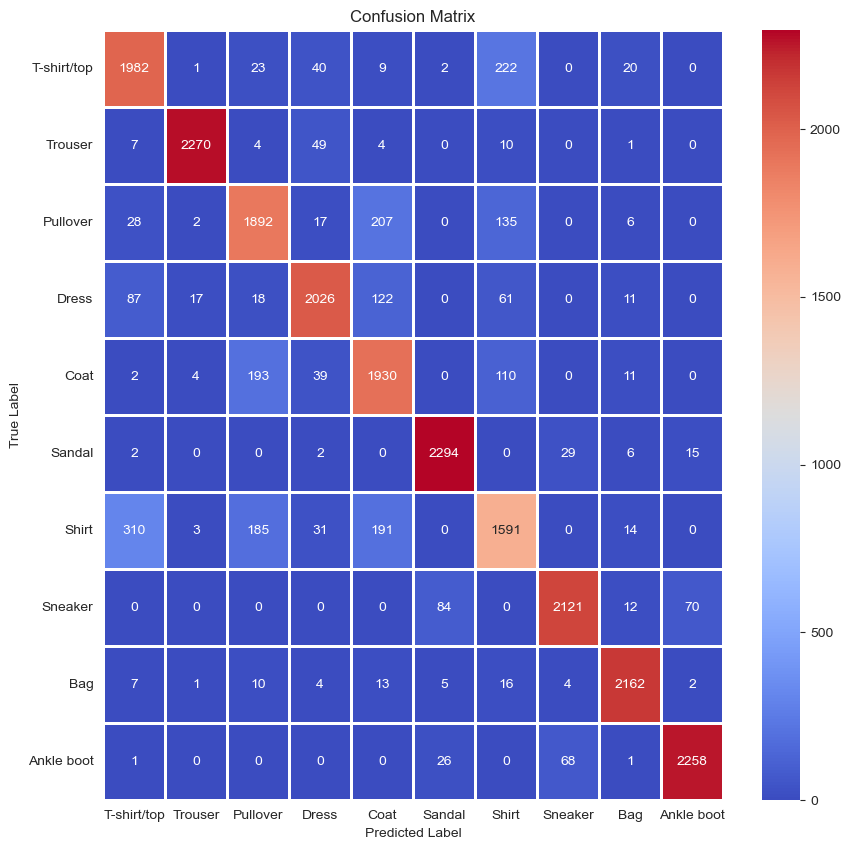

In [142]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model.eval()
correct = 0
total = 0
test_loss = 0.0

y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        test_loss += loss.item()

        predicted = outputs.argmax(dim=1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

        # Zbieramy dane do analizy
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# --- metrices ---
print(f"Test Loss: {test_loss/len(test_loader):.4f}, Test Accuracy: {100 * correct / total:.2f}%")

# --- confusion matrix ---
cm = confusion_matrix(y_true, y_pred)


LABELS= ["T-shirt/top",
"Trouser",
"Pullover",
"Dress",
"Coat",
"Sandal",
"Shirt",
"Sneaker",
"Bag",
"Ankle boot"]

show_confusion_matrix(cm,labels=LABELS)

**TODO** Experiment with various numbers of epochs and batch sizes

# 2.2 Convolutional Neural Networks - introduction


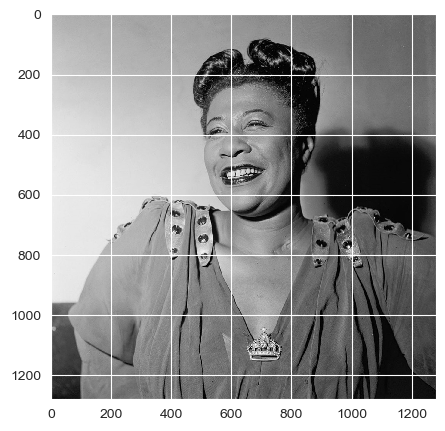

In [102]:
#Load an image
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (5, 5)


response = requests.get('https://cdn.pixabay.com/photo/2016/05/11/18/57/ella-fitzgerald-1386214_1280.jpg')
img = Image.open(BytesIO(response.content))


plt.imshow(img)

X_img.shape=(1280, 1280, 3)
X.shape=(1280, 1280)


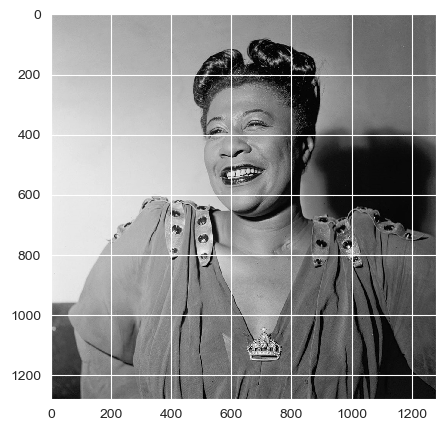

In [103]:
import numpy as np
X_img = np.array(img)
print(f'X_img.shape={X_img.shape}')

X=X_img[:,:,0]
print(f'X.shape={X.shape}')
plt.rcParams['image.cmap'] = 'gray'
plt.imshow(X)
plt.show()

## 2.2.1 Convolution 2D

During the convolution a small filter F slides along an image X.
Then the filter elements are multiplied by corresponding pixel values and summed. Convolution can be used to blurr an image, but also detect edges or extract gradients of pixel intensity.

[Diagram](https://miro.medium.com/max/928/0*e-SMFTzO8r7skkpc)


In [105]:
def conv2D(X,F,bias=0):
  w = F.shape[1]//2
  h = F.shape[0]//2
  Y=[ [ np.sum(X[i-h:i+h+1,j-w:j+w+1]*F) + bias for j in np.arange(w,X.shape[1]-w)] for i in np.arange(h,X.shape[0]-h)]
  return np.array(Y)

In [107]:
def apply_two_convolutions(X):
  F_sobel_y=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
  F_sobel_x=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

  XX = conv2D(X,F_sobel_x,1)
  XY = conv2D(X,F_sobel_y,1)
  return XX,XY

AX,AY = apply_two_convolutions(X)

In [72]:
print(f'X.shape={X.shape} AX.shape={AX.shape} AY.shape={AY.shape}')

X.shape=(1280, 1280) AX.shape=(1278, 1278) AY.shape=(1278, 1278)


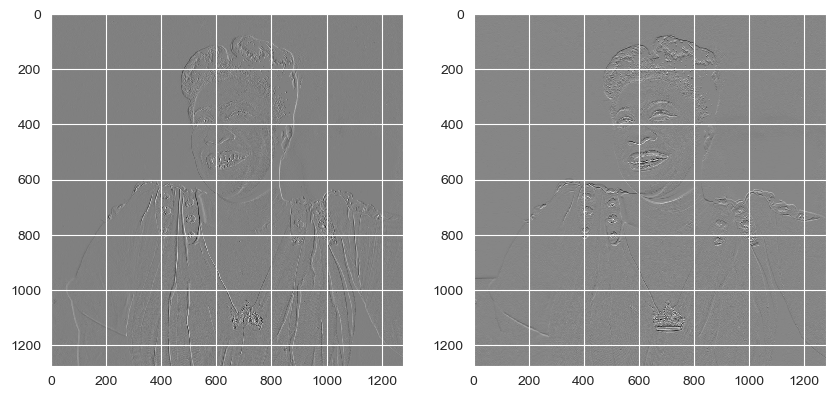

In [73]:
def plot(X,Y,cmap='gray'):
  fig = plt.figure(figsize=(10,10))
  plt.set_cmap(cmap)
  fig.add_subplot(1,2,1)
  # plt.axis('off')
  plt.imshow(X)
  fig.add_subplot(1,2,2)
  plt.imshow(Y)

plot(AX,AY)

During max pooling a window slides through an image (the strides are equal to the window sizes). At each position the maximal value of the pixel within the window is selected. Max pooling shrinks the image size.

image size:(639, 639)


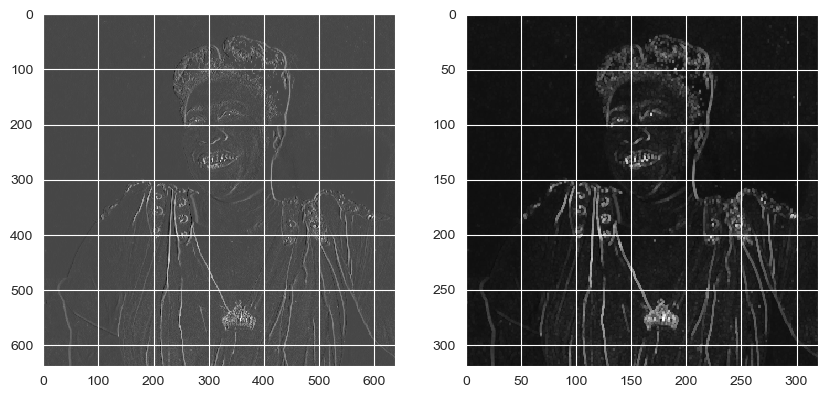

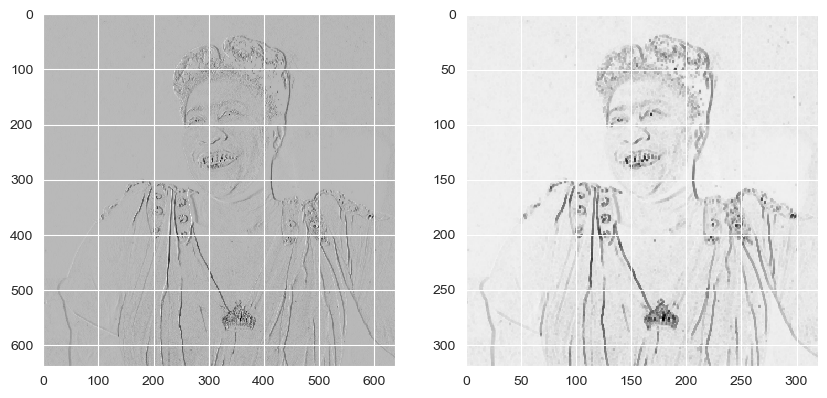

In [74]:
def maxPool2D(X,shape):
  w = shape[1]
  h = shape[0]
  # print(f'h={h} w={w}')
  Y=[ [ np.max(X[i:i+h+1,j:j+w+1]) for j in np.arange(0,X.shape[1],shape[1])] for i in np.arange(0,X.shape[0],shape[0])]
  return np.array(Y)

AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

We will repeat the convolution and max-pooling steps several times...

image size:(319, 319)


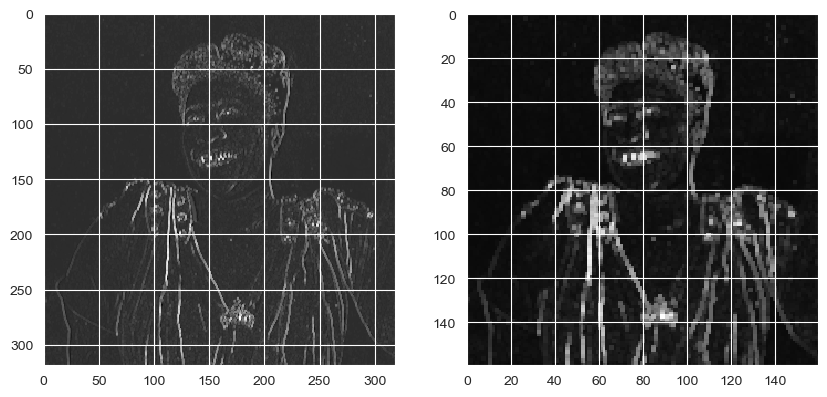

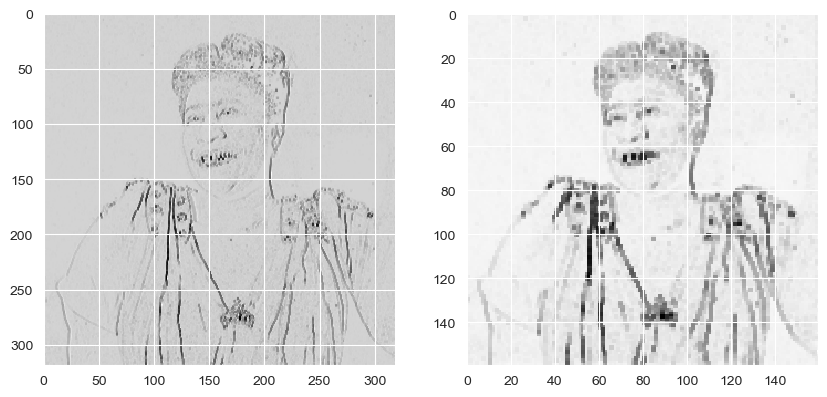

In [75]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(159, 159)


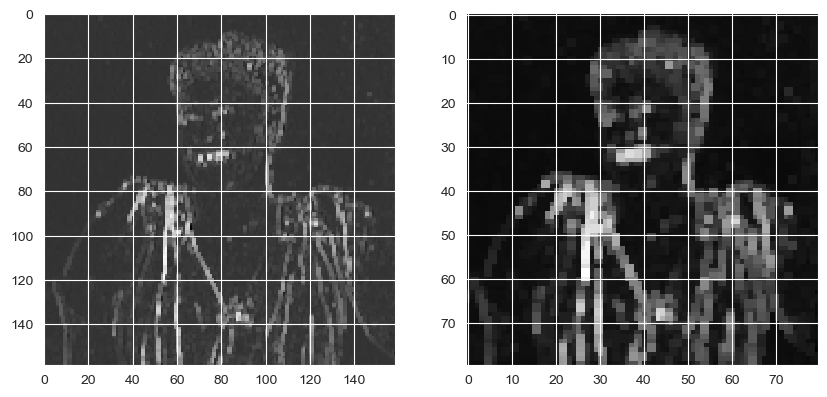

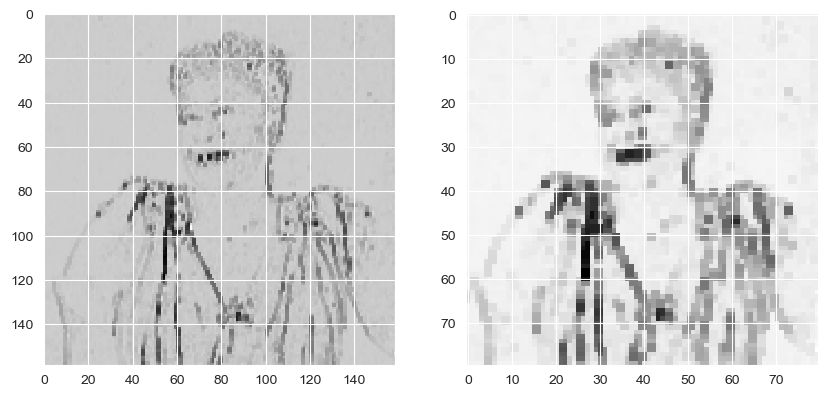

In [76]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(79, 79)


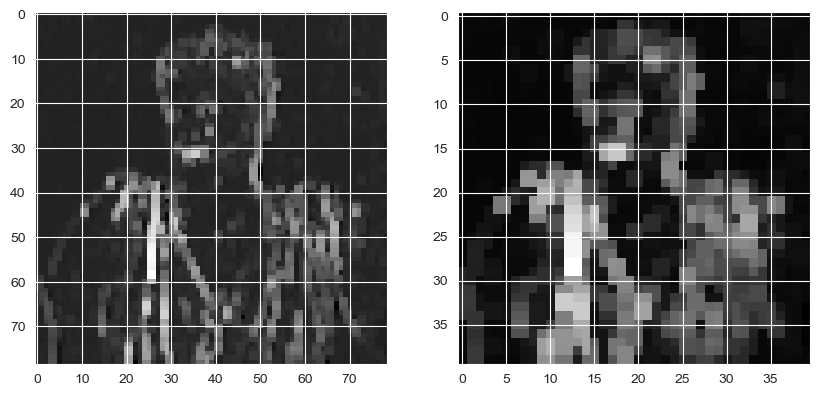

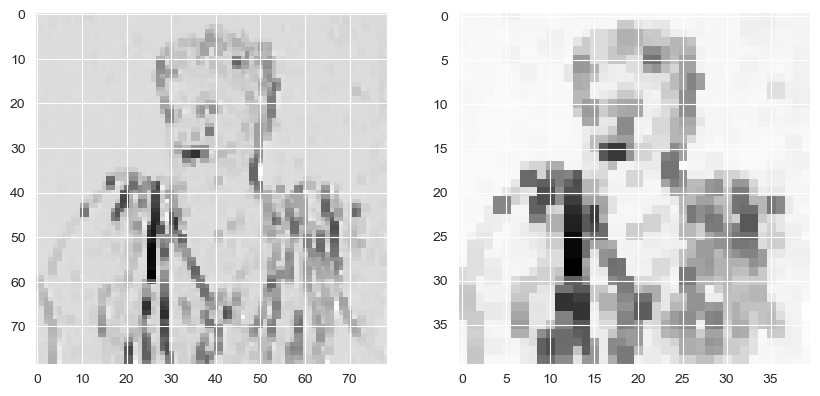

In [77]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

image size:(39, 39)


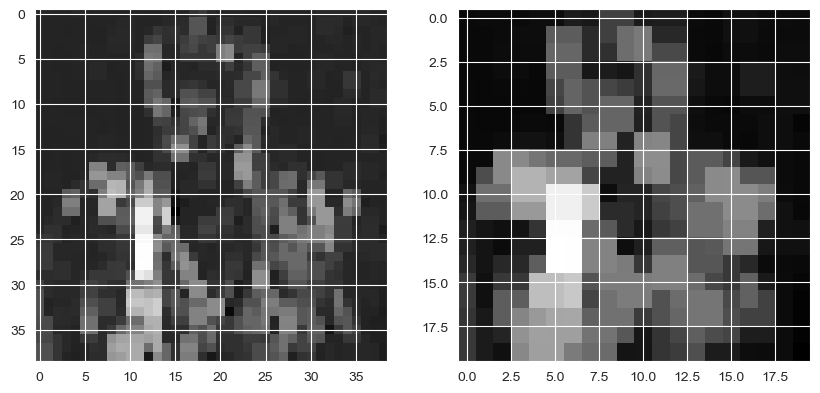

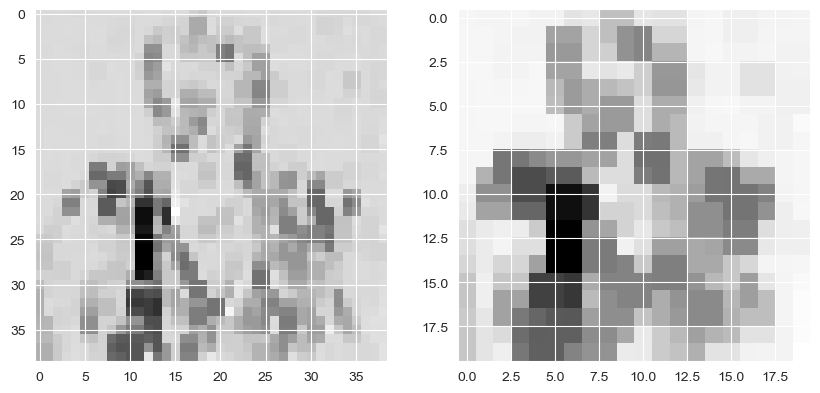

In [78]:
AX,AY = apply_two_convolutions(AX)
AX=maxPool2D(AX,(2,2))
AY=maxPool2D(AX,(2,2))
plot(AX,AY)
plot(AX,AY,cmap='gray_r')
print(f'image size:{AX.shape}')

Probably the last convolution went too far...

Then the image is flattened (converted to a vector) and submitted as input to next processing steps (e.g. classification).

In [79]:
AX_flattended = AX.flatten()
print(f'After flattening: {AX_flattended.shape}')

After flattening: (1521,)


## 2.2.2. CNN

Typical process in image recogntion (old approach):

**Feature extraction**
1.   Preprocess an image (eg. apply filters, convert to grayscale)
2.   Select a convolution filter
3.   Apply convolution in order to extract features, use a functions like [scipy.signal.convolve2d](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html), probably written in C
4.   Optionally: apply max pooling
5.   Optionally: repeat steps 2, 3, 4
**Training and testing**
6.   Select a classifier, e.g. SVM
7.   Train the classifier using vectors of extracted features as observations
8.   Test its performance
8.   If not satisfied return to 1



Basic ideas of CNNs:
*  Feature extraction is included into the training process: convolutional layers are parts of the architecture
*  No savvy filter selection is required: filters are learned (based on the loss function that expresses classification or regression goals)
*  At a given steps a number of filters can be applied simultaneously adding the corresponding number of channels at output
*  Architecture may contain multiple sequences of convolution and pooling steps. It is believed that this corresponds to extracting more and more abstract features, eg:
   * First sequence: extract contours
   * Second layer: extract such objects as eyes, noses
   * Third layer: extract faces, etc

**TODO** Calculate the number of trainable parameters.

Provide the formula that gives the number of trainable parameters based on the values of defined variables.

$P=???$

Fill in the table below

| (img_cols,img_rows) | channels | filters | kernel size | Tensor shape after convolution | Tensor shape after pooling | number of parameters |
|---------------------|----------|---------|-------------|--------------------------------|----------------------------|----------------------|
| (10,10)             | 1        | 1       | (3,3)       | ???                            | ???                        | ???                  |
| (10,10)             | 1        | 5       | (3,3)       |                                |                            |                      |
| (10,10)             | 3        | 1       | (5,5)       |                                |                            |                      |
| (10,10)             | 3        | 5       | (3,3)       |                                |                            |                      |
| (16,16)             | 3        | 64      | (3,3)       |                                |                            |                      |


Observe the following:
*   None in an output shape is the dimension for multiple observations (here:  images) in an input batch
*   The same filter is applied to all image channels, then the bias term added.
*   All filters have separate parameters
*   Number of parameters for a dense layer is equal to the number of connections + one for the bias term

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

#variables
img_rows=10
img_cols=10
channels=3
filters=8
kernel_size=(3,3)

model = models.Sequential()
model.add(layers.Conv2D(filters, kernel_size=kernel_size, activation='relu', input_shape=(img_rows, img_cols,channels,)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1))
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 8, 8, 8)        │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 209 (836.00 B)

 Trainable params: 209 (836.00 B)

 Non-trainable params: 0 (0.00 B)

## 2.2.3 Applying CNN to Fashion dataset

Create a CNN model

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

tf.random.set_seed(42)
num_classes = int(y_train.max() + 1)

model = models.Sequential()
model.add(layers.Input(shape=(X_train.shape[1], X_train.shape[2],1)))

model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
# Flatten the output to input data to the Dense layer
model.add(layers.Flatten())
# Dense layers - similar to the previous model, but using the smaller number of units
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 8)      │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │        43,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,706 (170.73 KB)

 Trainable params: 43,706 (170.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(0.02),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
epochs = 30
batch_size = 2048
hist = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data=(X_test, y_test))

Epoch 1/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 522ms/step - accuracy: 0.4136 - loss: 2.2242 - val_accuracy: 0.7855 - val_loss: 0.5941
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 428ms/step - accuracy: 0.7728 - loss: 0.6253 - val_accuracy: 0.8044 - val_loss: 0.5518
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 487ms/step - accuracy: 0.8092 - loss: 0.5254 - val_accuracy: 0.8061 - val_loss: 0.5456
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 561ms/step - accuracy: 0.8212 - loss: 0.4815 - val_accuracy: 0.8182 - val_loss: 0.4847
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 503ms/step - accuracy: 0.8408 - loss: 0.4365 - val_accuracy: 0.8476 - val_loss: 0.4380
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 20s 499ms/step - accuracy: 0.8588 - loss: 0.3861 - val_accuracy: 0.8578 - val_loss: 0.3867
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 21s 533ms/step - accuracy: 0.8613 - loss: 0.3725 - val_accuracy: 0.8761 - val_loss: 0.3412
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 488ms/step - accuracy: 0.8730 - loss: 0.3464 - val_accu

Compute scores on the validation set

In [ ]:
test_proba = model.predict(X_test)
y_test_pred = np.argmax(test_proba,axis=1)

722/722 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


Display the confusion matrix

The function from the previous classes was split into two functions...

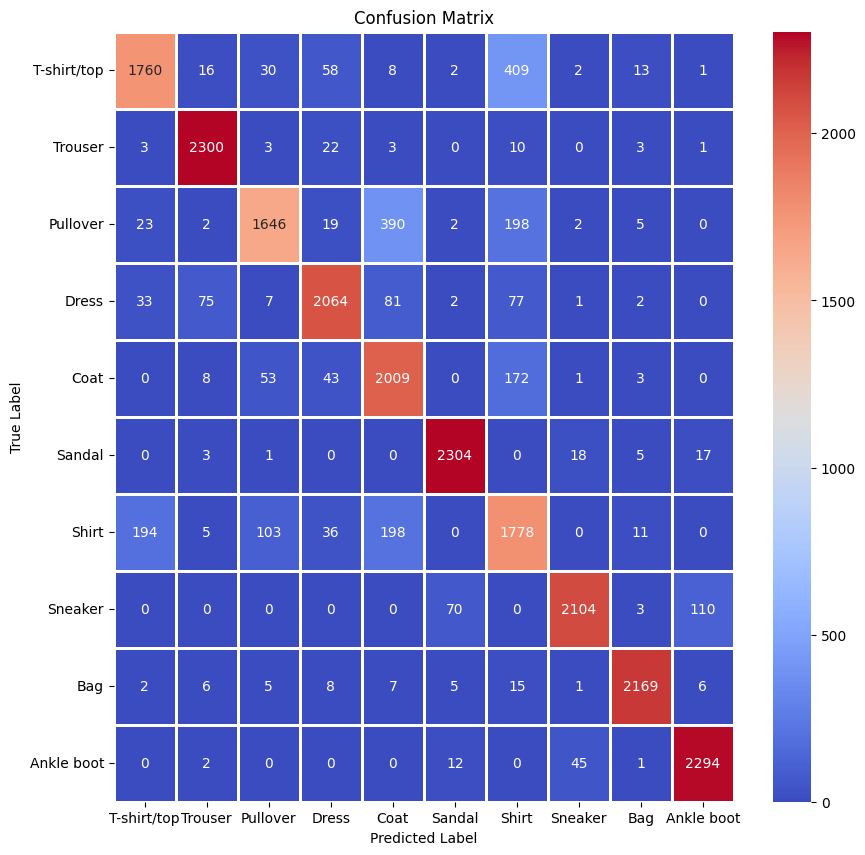

In [ ]:
show_confusion_matrix(confusion_matrix(y_test,y_test_pred),LABELS)

In [ ]:
probs = model.predict(X_test)
y_pred = np.argmax(probs,axis=1)
print(f'y_pred.shape={y_pred.shape}')

722/722 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
y_pred.shape=(23100,)


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2299
           1       0.95      0.98      0.97      2345
           2       0.89      0.72      0.80      2287
           3       0.92      0.88      0.90      2342
           4       0.75      0.88      0.81      2289
           5       0.96      0.98      0.97      2348
           6       0.67      0.76      0.71      2325
           7       0.97      0.92      0.94      2287
           8       0.98      0.98      0.98      2224
           9       0.94      0.97      0.96      2354

    accuracy                           0.88     23100
   macro avg       0.89      0.88      0.88     23100
weighted avg       0.89      0.88      0.88     23100



# 2.3 Wrap it as a function

Digression related to Python technicalities:

*  it is possible to define a function taking as parameter a dictionary mapping keywords to values
*  and call it specifying keywords or passing a dictionary

In [ ]:
def foo(**kwargs):
  print('foo')
  for k in kwargs:
    print(k,kwargs[k])

foo(ala=0,ma=1,kota=2)


foo
ala 0
ma 1
kota 2


In [ ]:
def boo(**kwargs):
  ala = kwargs.get('ala',0)
  ma = kwargs.get('ma',111)
  kota = kwargs.get('kota',222)
  print('boo',ala,ma,kota)

boo(ala=23)

boo(**{'ala':123,'ma':12})

boo 23 111 222
boo 123 12 222


It is up to you what to do with unknown keywords

In [ ]:
def woo(**kwargs):
  keywords = ['ala','ma','kota']
  for k in kwargs:
    if k not in keywords:
      raise ValueError(f'Unknown keyword {k}')
  ala = kwargs.get('ala',0)
  ma = kwargs.get('ma',1)
  kota = kwargs.get('kota',2)
  print('woo',ala,ma,kota)

woo(**{'ala':-1})
try:
  woo(**{'ala':-1,'ola':-2})
except Exception as e:
  print(e)

woo -1 1 2
Unknown keyword ola


## Define a function building a CNN model

**TODO** Define at adding **at least** two new MLP and two new CNN models

In [ ]:
from keras import layers
from keras import models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf

def build_model(model_name,input_shape,num_classes,random_state=42):
  tf.random.set_seed(random_state)
  if model_name== 'MLP_0':
    model = models.Sequential()
    model.add(layers.Input(shape=(28,28,)))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu' ))
    model.add(layers.Dense(40, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'CNN_0':
    model = models.Sequential()
    model.add(layers.Input(shape=input_shape))
    model.add(layers.Conv2D(8, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model
  elif model_name == 'CNN_1':
    return None
  else:
    return None

## The function that trains a model, tests it and return scores

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def train_and_test(X_train,y_train,X_test,y_test,**kwargs):
  model_name = kwargs['model_name']
  epochs = kwargs.get('epochs',20)
  learning_rate = kwargs.get('learning_rate',0.01)
  batch_size = kwargs.get('batch_size',1024)
  random_seed = kwargs.get('random_seed',42)
  returnModel = kwargs.get('returnModel',True)

  input_shape = list(X_train.shape[1:])
  input_shape.append(1)
  input_shape=tuple(input_shape)

  num_classes = np.max(y_train)+1
  model = build_model(model_name,input_shape=input_shape,num_classes=num_classes,random_state=random_seed)
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
                loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size)
  preds = model.predict(X_test)
  y_pred = np.argmax(preds,axis=1)
  print(f'y_pred {y_pred.shape} {y_test.shape}')
  results = {}
  results['confusion_matrix'] = confusion_matrix(y_test,y_pred)
  results['accuracy'] = accuracy_score(y_pred,y_test)
  results['precision'] = precision_score(y_pred,y_test,average='macro')
  results['recall'] = recall_score(y_pred,y_test,average='macro')
  results['f1'] = f1_score(y_pred,y_test,average='macro')
  if returnModel:
    results['model'] = model
  return results


## Configurations
We will define a number of configurations to be tested. Each configuration defines the model name and a number of hyperparameters.


In [ ]:
configurations={
    'MLP_0':{'model_name':'MLP_0','epochs':20,'learning_rate':0.01,'random_seed':42},
    'CNN_0':{'model_name':'CNN_0','epochs':20,'learning_rate':0.01,'random_seed':42},
    # 'Third configuration':{'model_name':'model_1','epochs':20,'learning_rate':0.1,'random_seed':42},
}


Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4038 - loss: 4.8273
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6944 - loss: 0.8658
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7476 - loss: 0.6801
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7793 - loss: 0.5903
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8085 - loss: 0.5185
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8076 - loss: 0.5161
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8228 - loss: 0.4669
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.8441 - loss: 0.4133
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8402 - loss: 0.4236
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8491 - loss: 0.4028
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.8487 - loss: 0.3969
Epoch 12/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy:

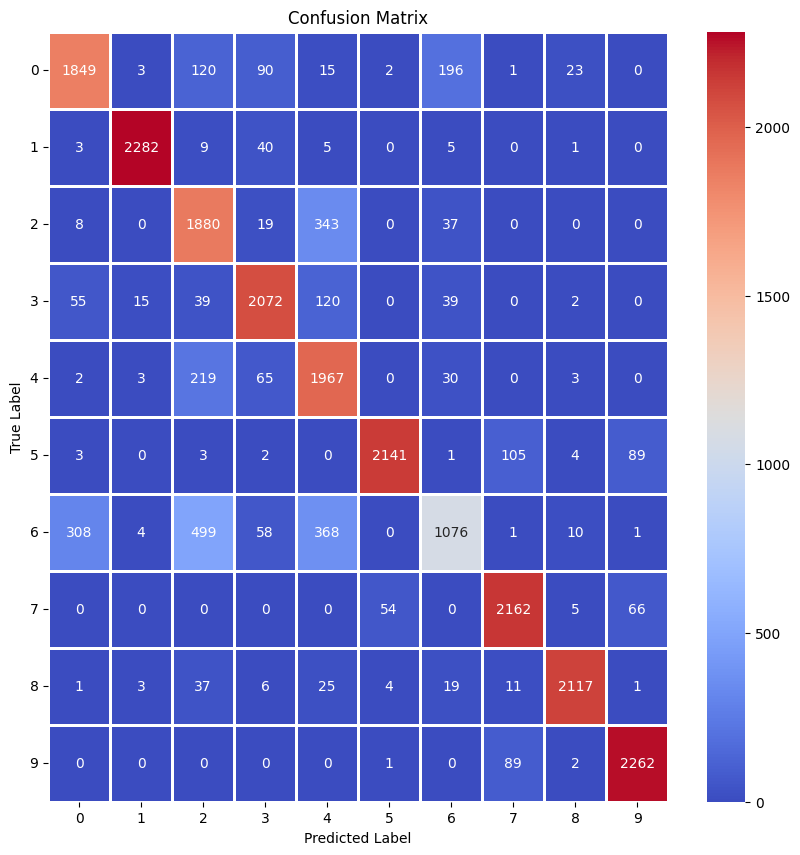

Accuracy:	0.857
Precision:	0.858
Recall:	0.862
F1:	0.854
Epoch 1/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - accuracy: 0.5005 - loss: 1.3519
Epoch 2/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.8081 - loss: 0.5197
Epoch 3/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - accuracy: 0.8516 - loss: 0.4106
Epoch 4/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 11s 199ms/step - accuracy: 0.8685 - loss: 0.3614
Epoch 5/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - accuracy: 0.8787 - loss: 0.3341
Epoch 6/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 171ms/step - accuracy: 0.8834 - loss: 0.3130
Epoch 7/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 212ms/step - accuracy: 0.8908 - loss: 0.2951
Epoch 8/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 12s 253ms/step - accuracy: 0.8996 - loss: 0.2733
Epoch 9/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 9s 200ms/step - accuracy: 0.8977 - loss: 0.2726
Epoch 10/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.9038 - loss: 0.2534
Epoch 11/20
46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 172ms/step - accuracy: 0.9083 - lo

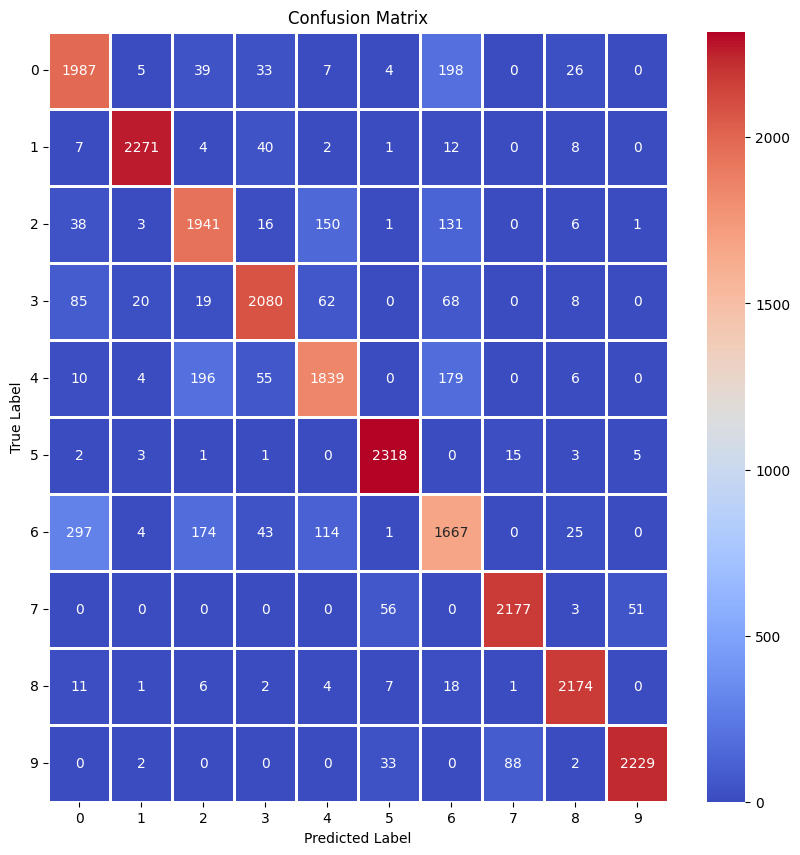

Accuracy:	0.895
Precision:	0.895
Recall:	0.896
F1:	0.895


In [ ]:
for cname in configurations:
  results = train_and_test(X_train,y_train,X_test,y_test,**configurations[cname])
  print(f'--- {cname} ---')
  # show results
  show_confusion_matrix(results['confusion_matrix'])
  print(f'Accuracy:\t{results["accuracy"]:.3}')
  print(f'Precision:\t{results["precision"]:.3}')
  print(f'Recall:\t{results["recall"]:.3}')
  print(f'F1:\t{results["f1"]:.3}')

**TODO** Prepare  (**at least 8 new**) configurations using **at least** two new MLP and two new CNN models and perform tests. Try to outperform the results obtained with the sample code.  

Present the results in the form of a table. A table can be entered as a markdown: [see the table generator](https://www.tablesgenerator.com/markdown_tables#). As an alternative, you may load data to Pandas DataFrame and display using df.head().

| Configuration         | Model name   | Hiperparameters                   | Accuracy | Precision | Recall | F1   |
|----------------------|---------|----------------------------------|----------|-----------|--------|------|
| MLP_0  | MLP_0 | epochs=20 learning_rate=0.01 itd | 0.67     | 0.78      | 0.65   | 0.72 |
| Second Configuration |         |                                  |          |           |        |      |

Hiperparameters can be placed in seperate columns...

# 2.4 Applying convolution to multivariate time series

## 2.4.1 Data generation

We will first generate multivariate time series data.

Assume that the city is divided into 5 districts and its inhabitatnt move between the districts during the day. One of the districts (number 2) is marked as the city center, the other are outskirts.

* In the morning people tend to move to the center and in the evening the return back.
* Movements between outskirts is also possible
* During night hours the activity diminishes

The generated time series show hourly counts of people in each district.

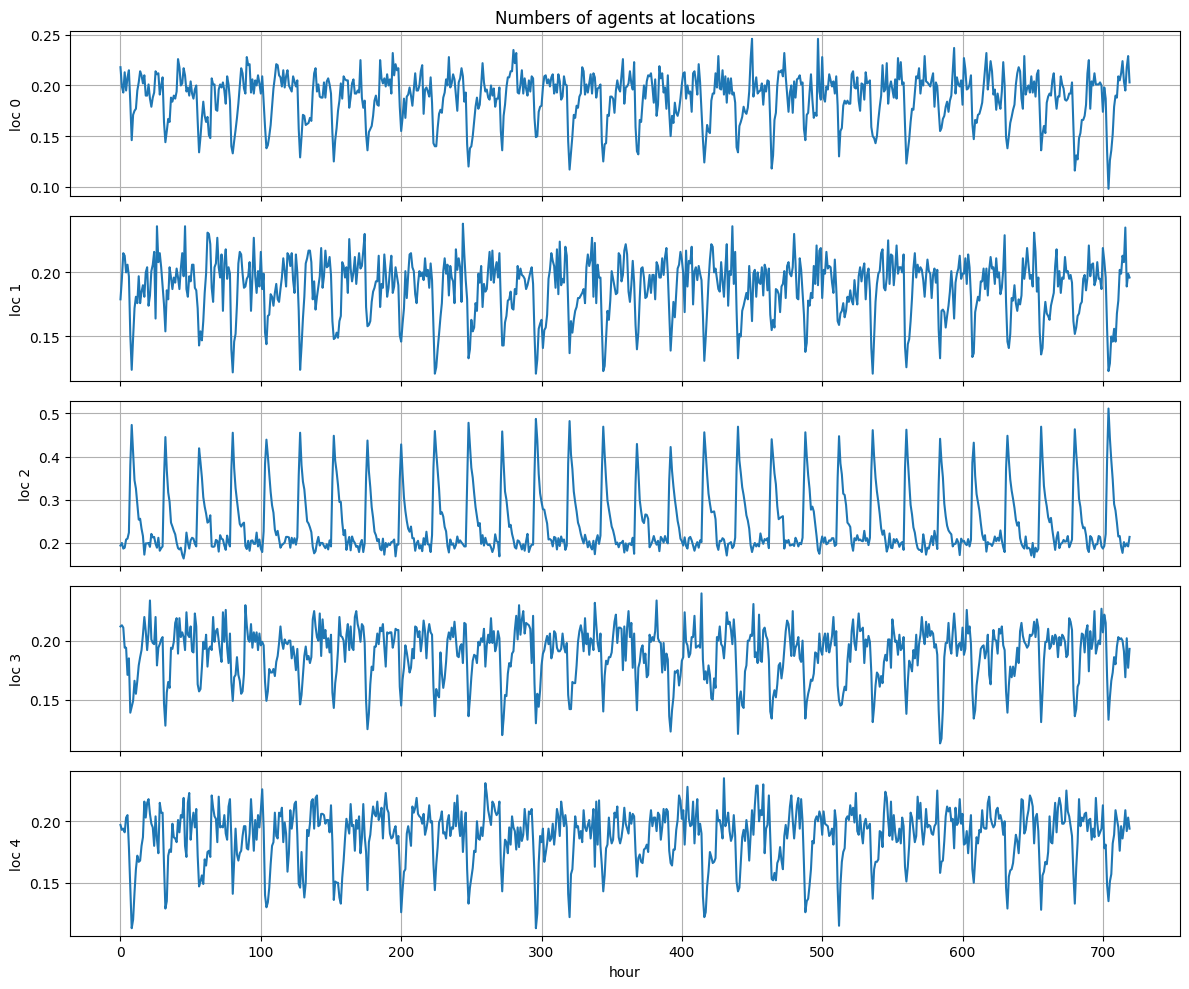

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# --- parameters ---
n_agents = 1000
n_locations = 5
center = 2
steps_per_day = 24
n_days = 30
T = steps_per_day * n_days

# --- parameters controlling  moves---
base_move_prob = 0.05
bias_to_center = 0.25
bias_to_home = 0.25
night_suppression = 0.2
random_variation = 0.05

# --- initiation of agnets ---
home = np.random.choice(n_locations, n_agents)
location = home.copy()
x = np.zeros((T, n_locations))

def hour_phase(hour):
    if 7 <= hour < 9:
        return 'morning'
    elif 9 <= hour < 17:
        return 'day'
    elif 17 <= hour < 19:
        return 'evening'
    else:
        return 'night'

# --- main sim loop ---
for t in range(T):
    hour = t % steps_per_day
    phase = hour_phase(hour)

    # basic transition matrix
    P = np.ones((n_locations, n_locations)) * base_move_prob
    np.fill_diagonal(P, 1 - base_move_prob * (n_locations - 1))

    if phase == 'morning':
        P[:, center] += bias_to_center
    elif phase == 'evening':
        for i in range(n_agents):
            P[location[i], home[i]] += bias_to_home
    elif phase == 'night':
        P = 1 - night_suppression + night_suppression * P

    # random perturbations
    P += random_variation * (np.random.rand(*P.shape) - 0.5)
    P = np.clip(P, 0, None)
    P /= P.sum(axis=1, keepdims=True)

    # updating agents locations
    new_locations = []
    for i in range(n_agents):
        loc = location[i]
        probs = P[loc]
        new_loc = np.random.choice(n_locations, p=probs)
        new_locations.append(new_loc)
    location = np.array(new_locations)

    # saving states (with normalization)
    for j in range(n_locations):
        x[t, j] = np.sum(location == j) / n_agents

# --- plots ---
fig, axes = plt.subplots(n_locations, 1, figsize=(12, 2*n_locations), sharex=True)

for j in range(n_locations):
    axes[j].plot(x[:, j], color='tab:blue')
    axes[j].set_ylabel(f"loc {j}")
    axes[j].grid(True)
    if j == 0:
        axes[j].set_title("Numbers of agents at locations")

axes[-1].set_xlabel("hour")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# assume, x has the shape (T, n_locations)
df = pd.DataFrame(x, columns=[f"loc_{j}" for j in range(n_locations)])
df.to_csv("population_timeseries.csv", index_label="t")
df.head()


,loc_0,loc_1,loc_2,loc_3,loc_4
0,0.218,0.179,0.194,0.212,0.197
1,0.199,0.195,0.200,0.213,0.193
2,0.193,0.215,0.187,0.211,0.194
3,0.213,0.213,0.189,0.194,0.191
4,0.195,0.200,0.208,0.194,0.203


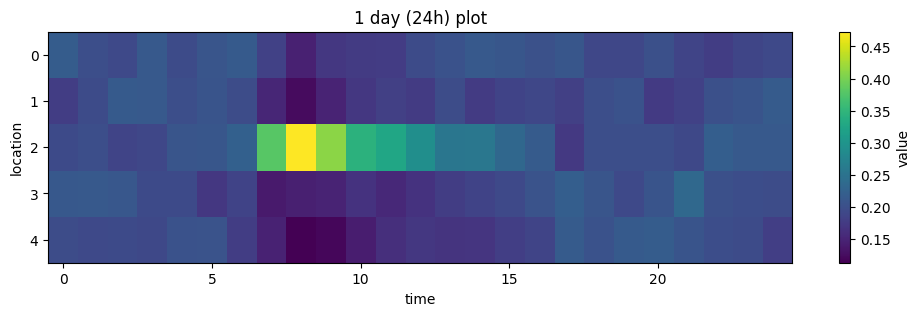

In [ ]:
X = df.to_numpy()
plt.figure(figsize=(12, 3))
plt.imshow(X.T[:,:24+1], cmap='viridis', aspect='auto', interpolation='none')
plt.colorbar(label='value')
plt.xlabel("time")
plt.ylabel("location")
plt.title("1 day (24h) plot")
plt.show()

We will use past $w$ (window) data samples to forecast values in $h$ (horizon) steps.

For example $w=24$ and $h=1$. So we will use matrices $X_i$ of size $5 \times w$ and $y_i$ of size $5$ to train a regressor, which will return $\hat{y}\in \mathbb{R}^5$.

We will apply multiple convolution 1D filters of size $5\times ks$ that move only horizontally from left to right. $ks$ stands for *kernel size*.Each convolution reduces the processed sequence by `2*ks//2`. Finally, the sequences produced by the convolution layers will be delivered to MLP, with 5 output neurons.

As the loss function MSE (suitable for a regression task) will be used.

In [ ]:
import numpy as np

# parameters
window_size = 24  # use last 24 hours to predict one hour ahead
n_features = n_locations

# tworzymy X i y
X = []
y = []

for t in range(T - window_size):
    X.append(df.iloc[t:t+window_size].values)
    y.append(df.iloc[t+window_size].values)

X = np.array(X)  # shape: (samples, window_size, n_features)
y = np.array(y)  # shape: (samples, n_features)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (696, 24, 5)
y shape: (696, 5)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


## 2.4.2 Tensorflow based implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, Dense, Flatten, Dropout
from tensorflow.keras import metrics

model = Sequential([
    Input(shape =(window_size, n_features)),
    Conv1D(filters=64, kernel_size=7, activation='relu'),
    Conv1D(filters=32, kernel_size=7, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(n_features)  # prediction of values in all locations
])

model.compile(optimizer='adam', loss='mse', metrics=[
        metrics.MeanAbsoluteError(name='mae'),
        metrics.RootMeanSquaredError(name='rmse'),
        metrics.R2Score(name='r2')
    ])
model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 18, 64)         │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 12, 32)         │        14,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,637 (162.64 KB)

 Trainable params: 41,637 (162.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0154 - mae: 0.0985 - r2: -25.3030 - rmse: 0.1199 - val_loss: 0.0024 - val_mae: 0.0385 - val_r2: -1.5522 - val_rmse: 0.0491
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0020 - mae: 0.0337 - r2: -0.9336 - rmse: 0.0445 - val_loss: 0.0016 - val_mae: 0.0283 - val_r2: -0.2620 - val_rmse: 0.0404
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0015 - mae: 0.0274 - r2: -0.1239 - rmse: 0.0386 - val_loss: 0.0014 - val_mae: 0.0249 - val_r2: -0.0871 - val_rmse: 0.0377
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0014 - mae: 0.0258 - r2: -0.0991 - rmse: 0.0369 - val_loss: 0.0012 - val_mae: 0.0235 - val_r2: 0.0016 - val_rmse: 0.0351
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012 - mae: 0.0243 - r2: -0.0277 - rmse: 0.0344 - val_loss: 0.0011 - val_mae: 0.0228 - val_r2: 0.0424 - val_rmse: 0.0332
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0010 - mae: 0.0226 - r2: 0

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0125e-04 - mae: 0.0126 - r2: 0.6313 - rmse: 0.0173 
Test MAE: 0.01248848531395197 Test RMSE: 0.01707996055483818 Test r2 0.6562260389328003
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


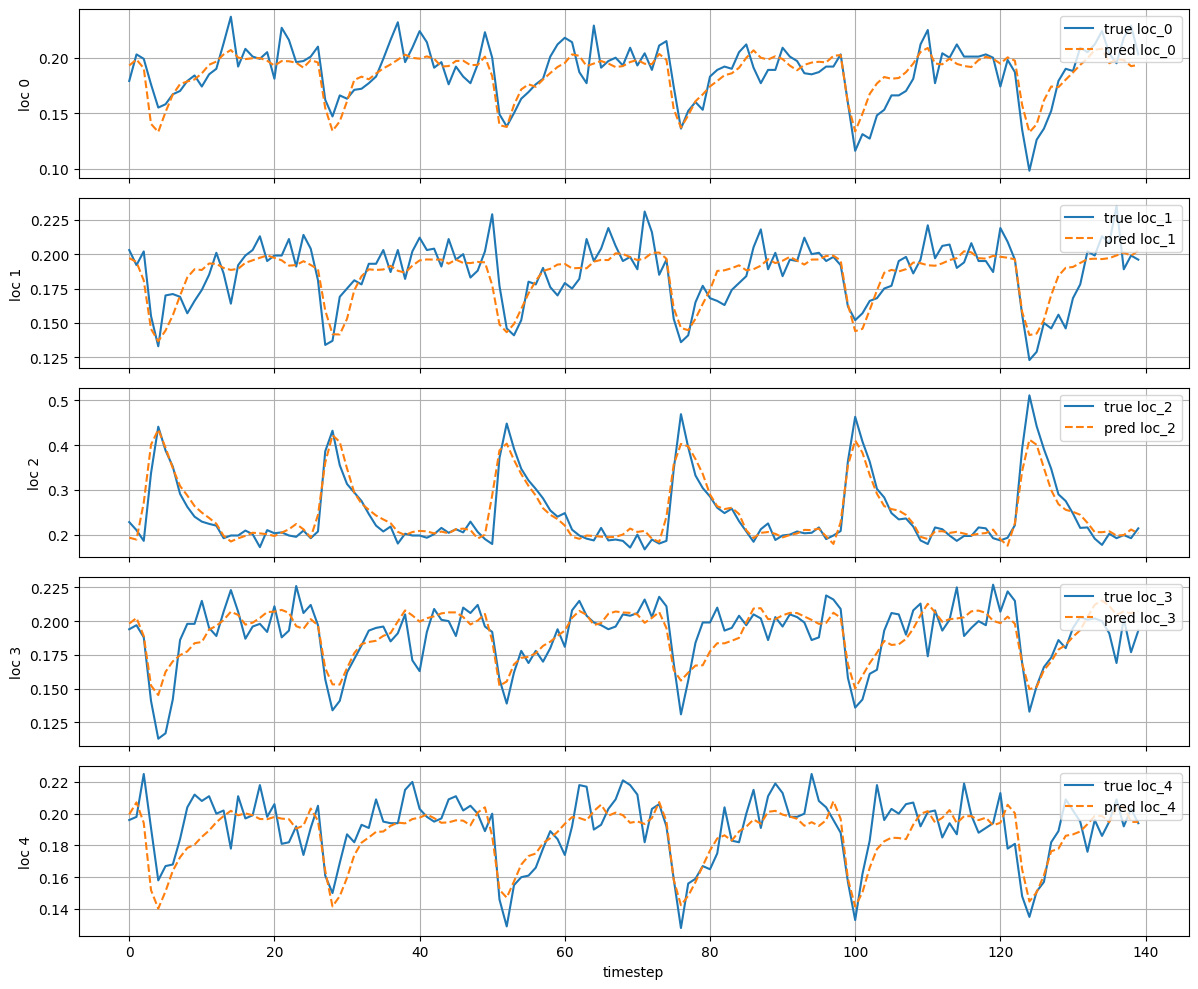

In [ ]:
import matplotlib.pyplot as plt

# evaluation
loss, mae,rmse,r2 = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae} Test RMSE: {rmse} Test r2 {r2}" )

# prediction
y_pred = model.predict(X_test)

fig, axes = plt.subplots(n_locations, 1, figsize=(12, 2*n_locations), sharex=True)

for j in range(n_locations):
    axes[j].plot(y_test[:150, j], label=f"true loc_{j}", color='tab:blue')
    axes[j].plot(y_pred[:150, j], '--', label=f"pred loc_{j}", color='tab:orange')
    axes[j].set_ylabel(f"loc {j}")
    axes[j].grid(True)
    axes[j].legend(loc='upper right')

axes[-1].set_xlabel("timestep")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
print(f'MSE: {mean_squared_error(y_test, y_pred)} RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))} R2 score: {r2_score(y_test, y_pred)}')

MSE: 0.00029172503608165167 RMSE: 0.017079960072601215 R2 score: 0.6562262462529725


## 2.4.3 PyTorch  based implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# --- Konwersja danych NumPy -> Torch ---
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# --- Parametry ---
window_size = X_train.shape[1]
n_features = X_train.shape[2]
batch_size = 32
num_epochs = 300

# --- Dataset i DataLoader ---
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(X_test_tensor, y_test_tensor)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# --- Model ---
class Conv1DModel(nn.Module):
    def __init__(self, window_size, n_features):
        super(Conv1DModel, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=n_features, out_channels=64, kernel_size=7)
        self.conv2 = nn.Conv1d(in_channels=64, out_channels=32, kernel_size=7)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        conv_output_size = window_size - 6 - 6  # każdy Conv1D z kernel_size=7 zmniejsza długość o 6
        self.fc1 = nn.Linear(32 * conv_output_size, 64)
        self.fc2 = nn.Linear(64, n_features)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # (batch, seq_len, features) -> (batch, features, seq_len)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = Conv1DModel(window_size, n_features)

# --- Optimizer and loss function ---
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()
mae_metric = nn.L1Loss()

# --- Trening z walidacją ---
for epoch in range(num_epochs):
    # --- TRAIN ---
    model.train()
    train_loss = 0
    train_mae = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * xb.size(0)
        train_mae += mae_metric(pred, yb).item() * xb.size(0)
    train_loss /= len(train_loader.dataset)
    train_mae /= len(train_loader.dataset)

    # --- VALIDATION ---
    model.eval()
    val_loss = 0
    val_mae = 0
    with torch.no_grad():
        for xb, yb in val_loader:
            pred = model(xb)
            loss = criterion(pred, yb)
            val_loss += loss.item() * xb.size(0)
            val_mae += mae_metric(pred, yb).item() * xb.size(0)
    val_loss /= len(val_loader.dataset)
    val_mae /= len(val_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {train_loss:.4f}, Train MAE: {train_mae:.4f} | "
          f"Val Loss: {val_loss:.4f}, Val MAE: {val_mae:.4f}")


Epoch 1/300 | Train Loss: 0.0124, Train MAE: 0.0833 | Val Loss: 0.0030, Val MAE: 0.0362
Epoch 2/300 | Train Loss: 0.0021, Train MAE: 0.0323 | Val Loss: 0.0018, Val MAE: 0.0297
Epoch 3/300 | Train Loss: 0.0016, Train MAE: 0.0267 | Val Loss: 0.0016, Val MAE: 0.0272
Epoch 4/300 | Train Loss: 0.0015, Train MAE: 0.0258 | Val Loss: 0.0016, Val MAE: 0.0251
Epoch 5/300 | Train Loss: 0.0015, Train MAE: 0.0255 | Val Loss: 0.0015, Val MAE: 0.0264
Epoch 6/300 | Train Loss: 0.0014, Train MAE: 0.0253 | Val Loss: 0.0015, Val MAE: 0.0249
Epoch 7/300 | Train Loss: 0.0013, Train MAE: 0.0250 | Val Loss: 0.0014, Val MAE: 0.0242
Epoch 8/300 | Train Loss: 0.0013, Train MAE: 0.0245 | Val Loss: 0.0013, Val MAE: 0.0226
Epoch 9/300 | Train Loss: 0.0011, Train MAE: 0.0232 | Val Loss: 0.0012, Val MAE: 0.0217
Epoch 10/300 | Train Loss: 0.0010, Train MAE: 0.0217 | Val Loss: 0.0010, Val MAE: 0.0210
Epoch 11/300 | Train Loss: 0.0009, Train MAE: 0.0205 | Val Loss: 0.0010, Val MAE: 0.0219
Epoch 12/300 | Train Loss: 0.0

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_tensor = model(X_test_tensor)
y_pred = y_pred_tensor.numpy()


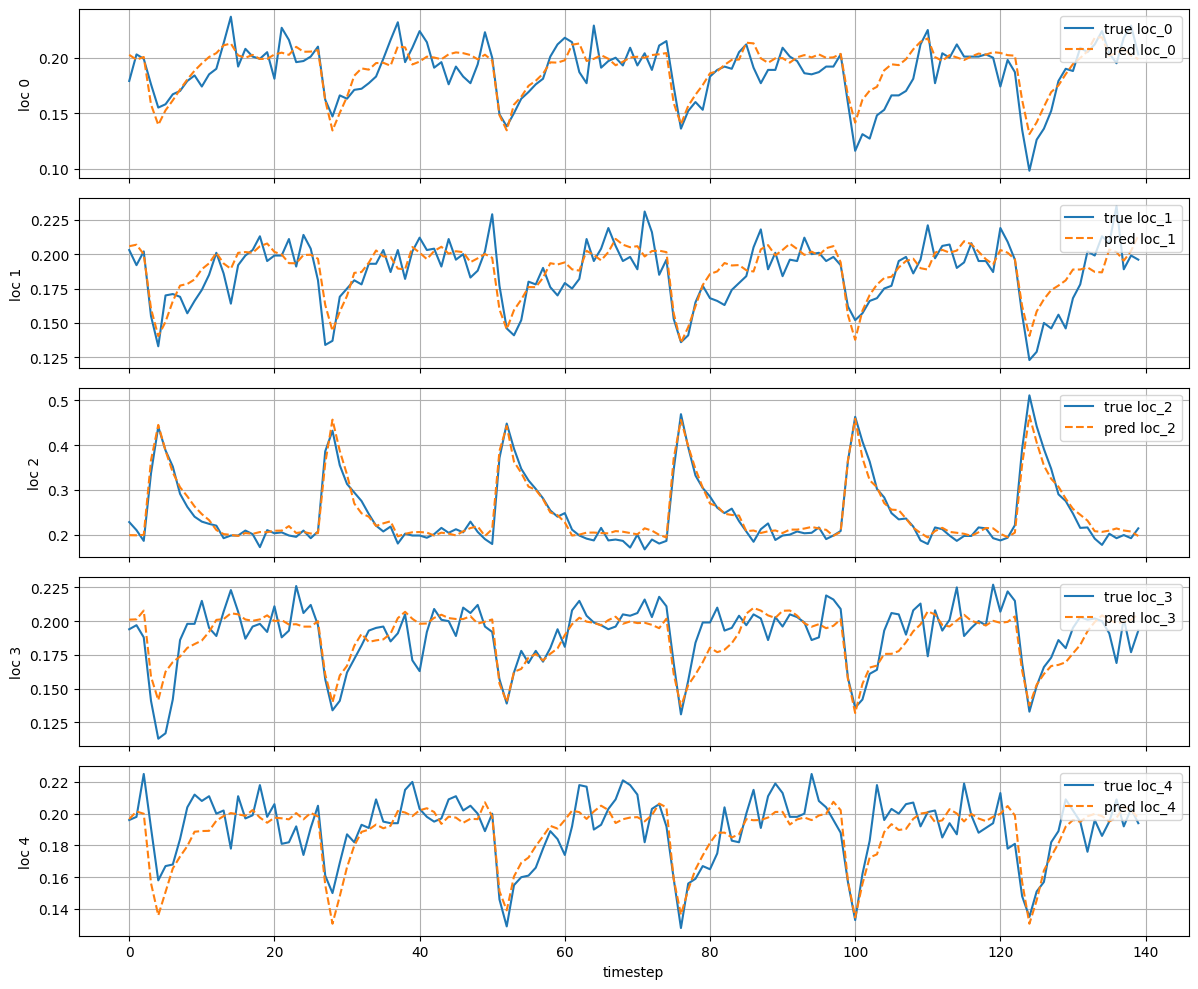

In [ ]:
fig, axes = plt.subplots(n_features, 1, figsize=(12, 2*n_features), sharex=True)

for j in range(n_features):
    axes[j].plot(y_test[:150, j], label=f"true loc_{j}", color='tab:blue')
    axes[j].plot(y_pred[:150, j], '--', label=f"pred loc_{j}", color='tab:orange')
    axes[j].set_ylabel(f"loc {j}")
    axes[j].grid(True)
    axes[j].legend(loc='upper right')

axes[-1].set_xlabel("timestep")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
print(f'MSE: {mean_squared_error(y_test, y_pred)} RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))} R2 score: {r2_score(y_test, y_pred)}')

MSE: 0.00021461753642808612 RMSE: 0.014649830593835757 R2 score: 0.6876177758846973


# 2.5 Tasks

Write a short report containg the following items. Use plots and tables. Make comments. Deliver as a PDF file.

* Section 2.1 (15%)
  * Select number of epochs being a tradeoff between processing time and accuracy.
  * Anlyze the confusion matrices. Indicate which articles were misclassified and why.
  * Compare results for TensorFlow and PyTorch for identical hiperparameters. Are they the same?

* Section 2.2 (15%)
  * Compute numbers of parameters CNN depeneding on input size, filter size and depth. Present results as a table

* Section 2.3 (30%)
  * Define configurations and perform test. Use various models and hyperparameters. Gather results in a table.

* Section 2.4 (Use Tensorflow or PyTorch) (30%)
  * Experiment with various window sizes, e.g. 6,12, 24
  * Use different numbers of filters and filter width (kernel sizes: $ks$)
  * You may also try to add a Dropout layer for regularization
  * Present results in a table. Report parameters and obtained scores (MAE, RMSE, R2). Display selected plots.

* Answer the following questions using 1-2 concise sentences (10%):
1. In the case of binary classification, how many output neurons and activation functions can be used?
2. What are the padding and stride parameters used  in convolution responsible for?
3. What parameters of the convolution network are modified during training?
4. Why for image processing we used 2D convolution and for time series 1D





